## Camera sensors

Welcome to the third exercise in Einführung in Visual Computing. This exercise gives you a basic knowledge and understanding of image processing, mainly with numpy. We will cover how to operate on images which are two dimensional numpy arrays in Python. 

The Jupyter Notebook provides the general programm sequence, once everything is implemented, you should see results as described in the main task description. For the later parts of the exercise, a GUI is provided which should open once you execute the respective cells.

Similar to Task 2, we first import everything we will need in our Jupyter Notebook. It is recommended to first import built in libraries (e.g. os, argparse, etc.), then third party libraries like numpy or matplotlib and last self-implemented python resources (see functions 'evc_xxx' or GUI).

In [4]:
%load_ext autoreload
%autoreload 1
%aimport evc_black_level, evc_histogram_clipping, evc_white_balance, evc_demosaic, evc_gamma_correction, evc_compute_binary, GUI.gui_white_balance, GUI.gui_gamma_correction, GUI.gui_gamma_histogram_clipping, GUI.gui_shared
#%matplotlib inline

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from GUI.ipython_helper import imEmbed

import evc_black_level, evc_histogram_clipping, evc_white_balance, evc_demosaic, evc_gamma_correction, evc_compute_binary
from GUI import gui_white_balance, gui_gamma_correction, gui_gamma_histogram_clipping

### Select image file
First, define the path of the image you want to deal with below. They are located in the images directory. 

In [5]:
file = 'images/IMG_2.tiff'

### Black Level
Since all of our images are saved as 16-bit TIFFs and we are provided with some metadata, we first will use this and extract the blacklevel and "as-shot-neutral" to transform the image. In evc_black_level, complete the function evc_read_file_info which should return those two variables by iterating over the metadata dictionary provided by PIL.

In [6]:
pattern = 'BGGR'
img_pil = Image.open(file)

blackLevel, asShotNeutral = evc_black_level.evc_read_file_info(file)
print(blackLevel, asShotNeutral)

1439 (0.465935, 1.0, 0.683893)


Next, implement evc_transform_colors which maps the image from [blackLevel, 65535] to [0, 1]. Pay attention to the datatype!

In [7]:
img = np.asarray(img_pil)
img_transformed_color = evc_black_level.evc_transform_colors(img, blackLevel)
print(np.max(img_transformed_color), np.min(img_transformed_color))
print(img_transformed_color.shape)

1.0189716 1.5601598e-05
(1158, 1738)


### Demosaic
Once our image is in the correct domain, we can apply the preprocessing: The images are captures by cameras using sensors with color filters and specific patterns commonly known as Bayer Patterns. As shown in the task description, your images include one of four different patterns (RGGB, BGGR, GRBG, GBRG). Implement the correct pattern for your task description (trying out all four) in evc_demosaic.

In [8]:
r, g, b = evc_demosaic.evc_demosaic_pattern(img_transformed_color, pattern)

Since we now obtained the red, blue and green channel, we can make use of the 'asShotNeutral' from above: In evc_demosaic.evc_transform_neutral, divide each channel by its respective value of the variable asShotNeutral.

In [9]:
R_trans, G_trans, B_trans = evc_demosaic.evc_transform_neutral(r,g,b, asShotNeutral)

We are almost done with the preprocessing: Due to the bayer pattern, we only have quarter/half of the information (=pixels) for each channel. The remaining pixels are still zero: Your task is to implement the interpolation in evc_interpolate.

In [10]:
R_inter, G_inter, B_inter = evc_demosaic.evc_interpolate(R_trans, G_trans, B_trans)


In evc_concat, concatenate the red, green, and blue channel so we can plot the image below.

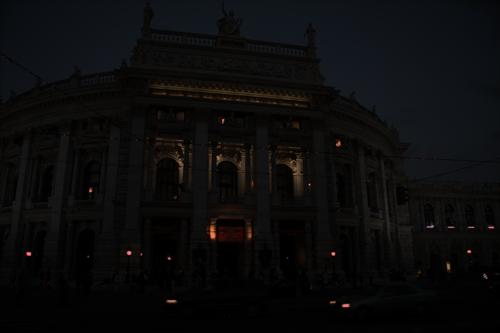

In [11]:
img_demosaic = evc_demosaic.evc_concat(R_inter, G_inter, B_inter)
imEmbed(img_demosaic / np.max(img_demosaic))

### White balance

We're done with the preprocessing, now we focus on enhancing the image. First, we implement white balancing. In evc_white_balance, implement the function 'evc_white_balance' and pay attention you properly deal with zeros. Once your implementation is correct, the GUI should guide you through the white balancing process and a nice image should be plotted below.

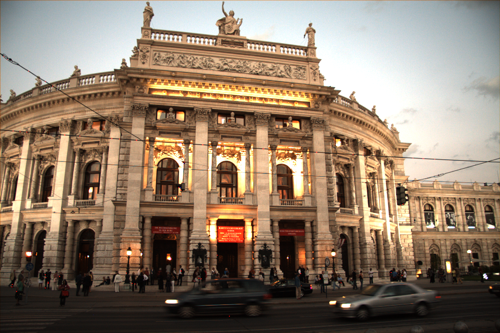

In [12]:
img_wb = gui_white_balance.gui_white_balance(img_demosaic)
imEmbed(img_wb)

### Gamma correction
Since the human eye has different perception for dark and bright areas (== non-linear), we can target this by a non-linear transformation known as gamma-correction (f(x) = x^i, where i is a parameter). Implement the gamma correction and apply the gamma correction via the provided gui to the white balanced image.

Secondly, we deal with a gamma correction which focuses on brightness: Refer to the task description and implement the corresponding functions. In the GUI is a checkbox to select the corresponding algorithm for the gamma correction.

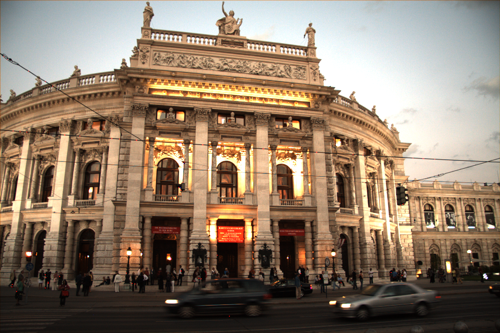

In [13]:
img_gamma_corrected = gui_gamma_correction.gui_gamma_correction(img_wb)
imEmbed(img_gamma_corrected)

### Contrast enhancement
Gamma corrected images usually suffer from low contrast - we can tackle this issue by implementing contrast enhancement. Mathematically, as discussed in the lecture, this is implemented as a linear transformation. Dark areas are mapped to zero, bright areas to one, the remaining parts of the image are then assigned to values between [0,1] which is perceived as high contrast. In the following tasks, you should implement the binarization in order to set the values which should be 0/1 as well as the histogramm clipping which performs the actual contrast enhancement. 

In [14]:
low, high = gui_gamma_histogram_clipping.gui_gamma_histogram_clipping(img_gamma_corrected)
print (f'low: {low}, high: {high}')

low: 0, high: 1


In [15]:
newLow, newHigh = evc_histogram_clipping.evc_prepare_histogram_range(img_gamma_corrected, low, high)

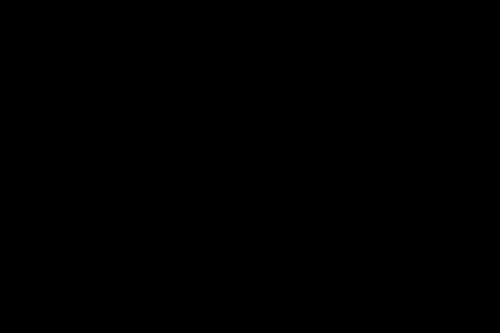

In [16]:
img_norm = evc_histogram_clipping.evc_transform_histogram(img_gamma_corrected, newLow, newHigh)
imEmbed(img_norm)

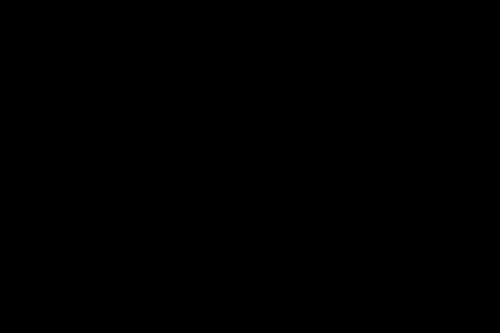

In [17]:
img_clipped = evc_histogram_clipping.evc_clip_histogram(img_norm)
imEmbed(img_clipped)